### 2.1

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#### 1. Gradient and Minimizer

Gradient:

$$
\nabla f(x_1, x_2) =
\begin{bmatrix}
6x_1 + 2x_2 - 4 \\
2x_1 + 6x_2 - 4
\end{bmatrix}
$$

Setting gradient to zero:

$$
\begin{cases}
6x_1 + 2x_2 = 4 \\
2x_1 + 6x_2 = 4
\end{cases}
$$

Solving gives:

$$
x_1 = 0.5, \quad x_2 = 0.5
$$

**Minimizer:**

$$
{x^* = (0.5, 0.5)}
$$


#### 2. Minimum Value

Evaluating at minimizer:

$$
f(0.5, 0.5) = 3(0.5)^2 + 2(0.5)(0.5) + 3(0.5)^2 - 4(0.5) - 4(0.5)
= -2.0
$$

**Minimum Value:**

$$
{f(x^*) = -2.0}
$$


#### 3. Convexity and Global Minimum

Hessian:

$$
\nabla^2 f(x) = \begin{bmatrix}
6 & 2 \\
2 & 6
\end{bmatrix}
$$

Eigenvalues of Hessian:

$$
\lambda = 6 \pm 2 = 4, 8
$$

Since all eigenvalues are positive, the function is **strictly convex**.


### Conclusion:

- \( f(x) \) is strictly convex which implies ( x* = (0.5, 0.5) \) is the unique global minimum.
- \( f(x*) = -2.0 \)


###  2.2

In [ ]:
# Function and its gradient
def f(x):
    return 3*x[0]**2 + 2*x[0]*x[1] + 3*x[1]**2 - 4*x[0] - 4*x[1]

def grad_f(x):
    return np.array([
        6*x[0] + 2*x[1] - 4,
        2*x[0] + 6*x[1] - 4])

# Gradient descent function
def gradient_descent_log_error(x0, x_star, eta=0.1, tau=1e-6, max_iter=10000):
    x = x0.copy()
    errors = []
    for _ in range(max_iter):
        error = np.linalg.norm(x - x_star)
        errors.append(np.log(error))
        grad = grad_f(x)
        if np.linalg.norm(grad) < tau:
            break
        x -= eta * grad
    return np.array(errors)

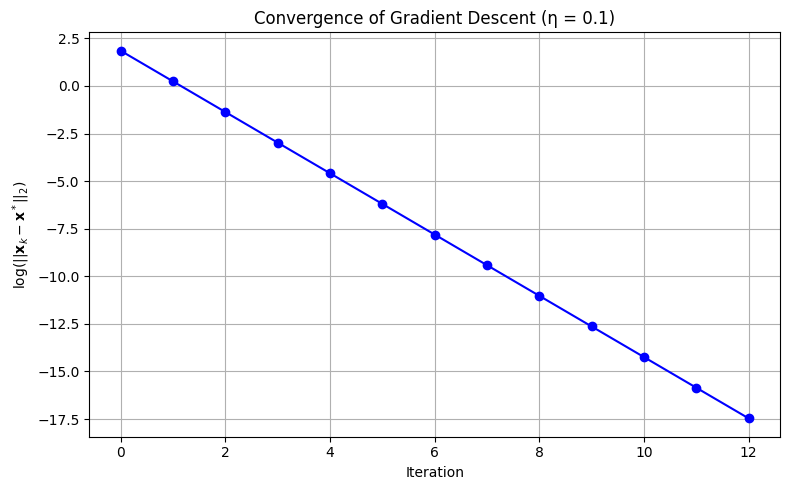

In [4]:
# Given values
x0 = np.array([5.0, 5.0])
x_star = np.array([0.5, 0.5])
eta = 0.1

# Run GD and get log error
log_errors = gradient_descent_log_error(x0, x_star, eta)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(log_errors, marker='o', linestyle='-', color='blue')
plt.xlabel("Iteration")
plt.ylabel(r"$\log(||\mathbf{x}_k - \mathbf{x}^*||_2)$")
plt.title("Convergence of Gradient Descent (η = 0.1)")
plt.grid(True)
plt.tight_layout()
plt.show()


- The plot shows the logarithmic decay of the error, **log(∥𝑥𝑘−x*∥2)**
, as iterations increase.
- Since the function is quadratic and convex, Gradient Descent converges towards the minimizer x* =(0.5,0.5), and we see the error reducing over time.
- The current plot is for η=0.1, which might be close to optimal for this function. However, experimenting with different values of η (like 0.01 or 0.2) could provide insight into whether a smaller or larger step size would speed up convergence or reduce oscillations.


### 2.3

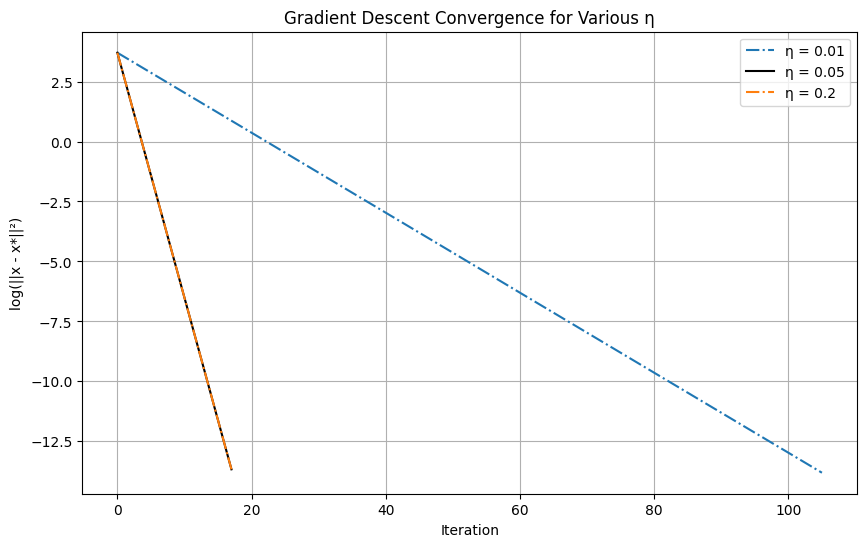

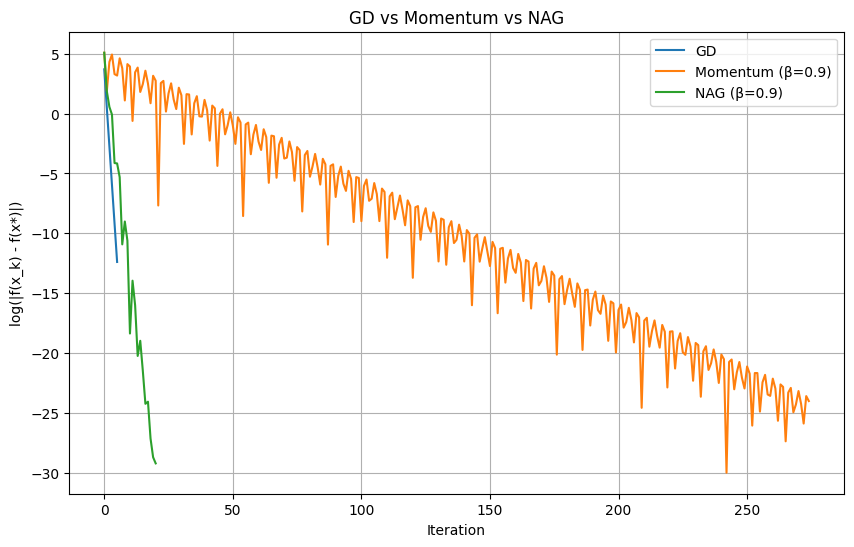

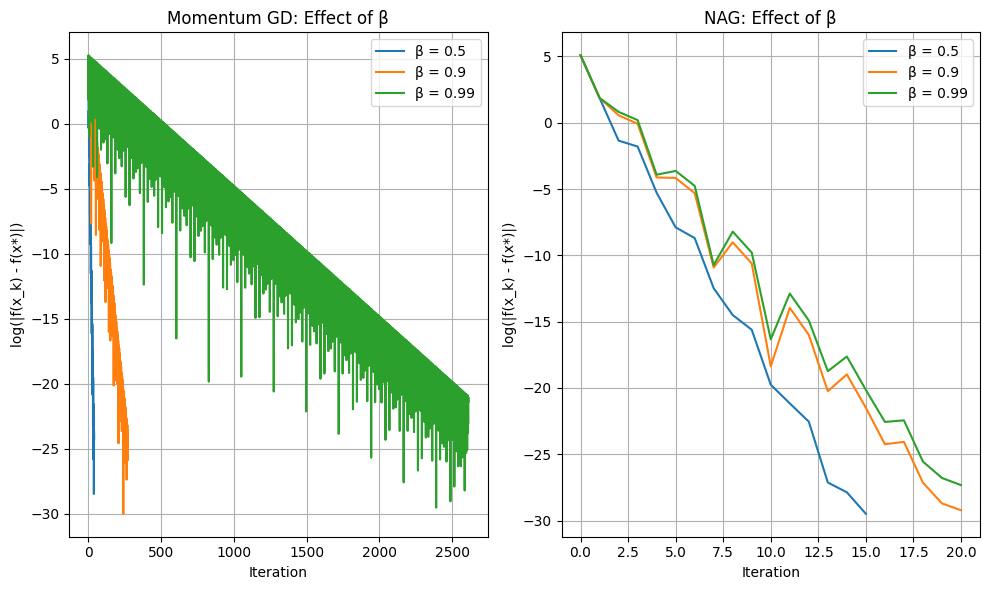

In [33]:
f_star = f(x_star)
tau = 1e-6

# Gradient Descent Implementation

def gradient_descent(x0, eta, max_iter=10000):
    x = x0.copy()
    history = []
    for _ in range(max_iter):
        err = np.linalg.norm(x - x_star)**2
        if err < tau:
            break
        history.append(np.log(err))
        x -= eta * grad_f(x)
    return history

# GD for different learning rates

x0 = np.array([5.0, 5.0])
etas = [0.01, 0.05, 0.2]

plt.figure(figsize=(10,6))
for eta in etas:
    history = gradient_descent(x0, eta)
    if eta == 0.05:
        plt.plot(history, linestyle='solid', color='black', label=f"η = {eta}")
    else:
        plt.plot(history, linestyle='dashdot',label=f"η = {eta}")
plt.xlabel("Iteration")
plt.ylabel("log(||x - x*||²)")
plt.title("Gradient Descent Convergence for Various η")
plt.legend()
plt.grid(True)
plt.show()

# Momentum GD Implementation

def gd_momentum(x0, eta, beta, max_iter=10000):
    x = x0.copy()
    v = np.zeros_like(x)
    history = []
    for _ in range(max_iter):
        fx_diff = abs(f(x) - f_star)
        if np.linalg.norm(grad_f(x)) < tau:
            break
        history.append(np.log(fx_diff))
        v = beta * v - eta * grad_f(x)
        x += v
    return history

# Nesterov Accelerated Gradient Implementation

def nag(x0, eta, beta, max_iter=10000):
    x = x0.copy()
    v = np.zeros_like(x)
    history = []
    for _ in range(max_iter):
        fx_diff = abs(f(x) - f_star)
        if np.linalg.norm(grad_f(x)) < tau:
            break
        history.append(np.log(fx_diff))
        y = x + beta * v
        v = beta * v - eta * grad_f(y)
        x += v
    return history

# Compare GD vs Momentum vs NAG

eta = 0.1
beta = 0.9
gd_hist = gradient_descent(x0, eta)
mom_hist = gd_momentum(x0, eta, beta)
nag_hist = nag(x0, eta, beta)

plt.figure(figsize=(10,6))
plt.plot(gd_hist, label="GD")
plt.plot(mom_hist, label="Momentum (β=0.9)")
plt.plot(nag_hist, label="NAG (β=0.9)")
plt.xlabel("Iteration")
plt.ylabel("log(|f(x_k) - f(x*)|)")
plt.title("GD vs Momentum vs NAG")
plt.legend()
plt.grid(True)
plt.show()

# Effect of β for Momentum and NAG

betas = [0.5, 0.9, 0.99]

plt.figure(figsize=(10, 6))

# Momentum GD
plt.subplot(1,2,1)
for b in betas:
    hist = gd_momentum(x0, eta, b)
    plt.plot(hist, label=f"β = {b}")
plt.title("Momentum GD: Effect of β")
plt.xlabel("Iteration")
plt.ylabel("log(|f(x_k) - f(x*)|)")
plt.legend()
plt.grid(True)

# NAG
plt.subplot(1,2,2)
for b in betas:
    hist = nag(x0, eta, b)
    plt.plot(hist, label=f"β = {b}")
plt.title("NAG: Effect of β")
plt.xlabel("Iteration")
plt.ylabel("log(|f(x_k) - f(x*)|)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


in fig 1 plots of 0.05 and 0.2 are overlapping however i have shown one with black dotted line and other with red solid line

- **Step size η=0.01**:
  - **Slow convergence**: The algorithm takes more iterations to reach the minimum, resulting in longer computation times.
  - **High stability**: Smaller updates prevent overshooting, ensuring the algorithm converges smoothly, but it can be inefficient.


- **Step size η=0.05**: This is likely a good balance between convergence rate and stability. We expect moderate convergence speed.

- **Step size 𝜂= 0.2**:
  - **Fast convergence**: The algorithm makes larger steps towards the minimum, potentially reducing the number of iterations.
  - **Risk of overshooting**: A large step size may lead to instability or oscillations, where the algorithm misses the minimum and fails to converge.

Choosing an optimal step size depends on the problem at hand. A moderate \(\eta\) like 0.1 typically balances speed and stability. However, dynamic adjustments of the step size, such as learning rate schedules or using momentum-based methods, can improve performance in more complex scenarios.


### Analysis of impact of momentum

1. **Momentum vs GD**:
   - **Momentum** accelerates convergence by smoothing out oscillations and speeding up movement along the descent direction. It improves convergence speed compared to basic GD.
   - **Momentum** tends to perform better in narrow valleys, where GD might zigzag or move slowly.

2. **Effect of \( \beta \) (Momentum coefficient)**:
   - **Larger \( \beta \) values (e.g., 0.9, 0.99) result in faster convergence, but too high a value might cause overshooting the minimum. Also we can see in the plots
   - Smaller \( \beta \) values (e.g., 0.5) lead to slower momentum and slower convergence, but are more stable.

3. **Momentum vs NAG**:
   - Nesterov Accelerated Gradient (NAG) improves upon Momentum by look-ahead correction and faster convergence. NAG often performs better than Momentum for the same \( \beta \).